In [ ]:
import os
import git

# Clone the GitHub repository
repo_url = 'https://github.com/CiCiyeah/Replication-for-DOTE6635-project-1_YI-Jiaci_Wang-Yachong'
repo_dir = 'Replication-for-DOTE6635-project-1_YI-Jiaci_Wang-Yachong/DOTE6635'

if not os.path.exists(repo_dir):
    git.Git().clone(repo_url)

# Change the current working directory to the cloned repository
os.chdir(repo_dir)

print("当前工作目录:", os.getcwd())

ValueError: mount failed

In [ ]:
import pandas as pd

# Specify the encoding when reading the CSV file
catagory = pd.read_csv('catagory.csv', encoding='gbk')  # Try 'gbk' or 'latin-1' if 'gbk' doesn't work

# Get the number of rows and columns.
num_rows = catagory.shape[0]
num_cols = catagory.shape[1]

print(f"The 'catagory' DataFrame has {num_rows} rows and {num_cols} columns.")

# Get data types of each column.
print("\nData types of each column:")
print(catagory.dtypes)

# Display the first few rows of the DataFrame.
print("\nFirst few rows of the DataFrame:")
print(catagory.head())

The 'catagory' DataFrame has 40 rows and 3 columns.

Data types of each column:
Category     object
Product      object
Price($)    float64
dtype: object

First few rows of the DataFrame:
                   Category  \
0                FruitJuice   
1               FruitDrinks   
2  BabyMilkandMilkFlavoring   
3                      Soup   
4           CatFood-WetType   

                                             Product  Price($)  
0  Capri Sun Variety Pack with Fruit Punch, Straw...      9.43  
1  Kool Aid Jammers Variety Pack with Tropical Pu...      7.27  
2  Horizon Organic Shelf-Stable Whole Milk Boxes,...     13.98  
3  Maruchan Ramen Noodle Chicken Flavor Soup, 3 O...      9.97  
4  Purina Fancy Feast Chicken Feast Classic Grain...      0.88  


In [ ]:
import pandas as pd
import numpy as np

# 读取probresponses5.csv文件
probresponses5 = pd.read_csv('probresponses5.csv')

# 计算每8行的平均值
averaged_data = probresponses5.groupby(probresponses5.index // 8).mean()

# 确保平均值数据有2000行
assert len(averaged_data) == 2000

# 读取output.csv文件
output = pd.read_csv('output.csv')

# 确保output数据有2000行3列
assert output.shape == (2000, 3)

# 合并两组数据
merged_data = pd.concat([output, averaged_data], axis=1)

# 确保合并后的数据有2000行4列
assert merged_data.shape == (2000, 4)

# 保存合并后的数据到新的CSV文件
merged_data.to_csv('merged_output.csv', index=False)

print("Data has been successfully merged and saved to 'merged_output.csv'.")


Data has been successfully merged and saved to 'merged_output.csv'.


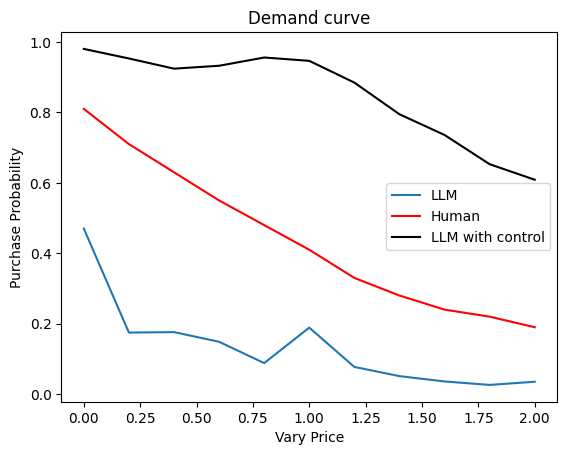

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
merged_df = pd.DataFrame(merged_data)
category_df = pd.DataFrame(catagory)
merged_df = merged_df.merge(category_df[['Category', 'Price($)']], on='Category', how='left')
merged_df
# 假设你的DataFrame是merged_df
# 生成新的一列Price/Price($)
merged_df['Price/Price($)'] = (merged_df['Price'] / merged_df['Price($)']).round(1)

# 仅保留Price/Price($)和response列，并重命名
df = merged_df[['Price/Price($)', 'response']].rename(columns={'Price/Price($)': 'vary price', 'response': 'purchase probability'})

# 计算purchase probability在vary price取不同值时的平均值
average_purchase_prob = df.groupby('vary price')['purchase probability'].mean().reset_index()

# 绘制折线图
plt.plot(average_purchase_prob['vary price'], average_purchase_prob['purchase probability'], label='LLM')

# 添加另一条线
additional_line = [0.81, 0.71, 0.63, 0.55, 0.48, 0.41, 0.33, 0.28, 0.24, 0.22, 0.19]
plt.plot(average_purchase_prob['vary price'], additional_line[:len(average_purchase_prob)], label='Human', color='red')

# 添加图例和标签
plt.xlabel('Vary Price')
plt.ylabel('Purchase Probability')
plt.legend()
plt.title('Demand curve')

# 显示图形
plt.show()




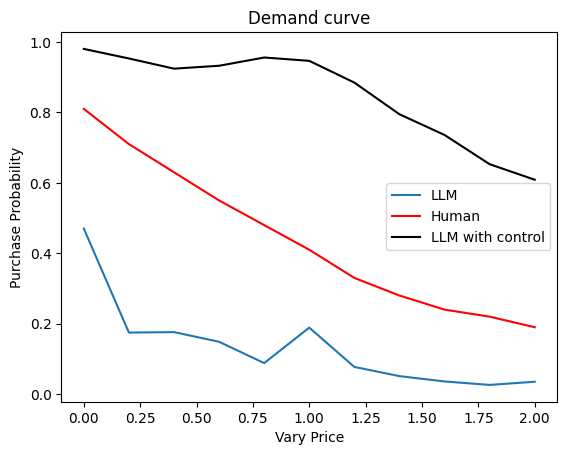

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
merged_df = pd.DataFrame(merged_data)
category_df = pd.DataFrame(catagory)
merged_df = merged_df.merge(category_df[['Category', 'Price($)']], on='Category', how='left')
merged_df
# 假设你的DataFrame是merged_df
# 生成新的一列Price/Price($)
merged_df['Price/Price($)'] = (merged_df['Price'] / merged_df['Price($)']).round(1)

# 仅保留Price/Price($)和response列，并重命名
df = merged_df[['Price/Price($)', 'response']].rename(columns={'Price/Price($)': 'vary price', 'response': 'purchase probability'})

# 计算purchase probability在vary price取不同值时的平均值
average_purchase_prob = df.groupby('vary price')['purchase probability'].mean().reset_index()

# 绘制折线图
plt.plot(average_purchase_prob['vary price'], average_purchase_prob['purchase probability'], label='LLM')

# 添加另一条线
additional_line = [0.81, 0.71, 0.63, 0.55, 0.48, 0.41, 0.33, 0.28, 0.24, 0.22, 0.19]
plt.plot(average_purchase_prob['vary price'], additional_line[:len(average_purchase_prob)], label='Human', color='red')
additional_line = [0.980263, 0.953125, 0.924242, 0.932432, 0.955882, 0.946429, 0.884615, 0.794737, 0.735897, 0.652941, 0.608824
]
plt.plot(average_purchase_prob['vary price'], additional_line[:len(average_purchase_prob)], label='LLM with control', color='black')
# 添加图例和标签
plt.xlabel('Vary Price')
plt.ylabel('Purchase Probability')
plt.legend()
plt.title('Demand curve')

# 显示图形
plt.show()


